**Let's Start**

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [3]:
# Read in the dataset
playstore = pd.read_csv('F:/googleplaystore.csv')

In [4]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
playstore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


proplem 1: reviews column is string type
problem 2: We need to remove 'M' letters in size column and change its type to float
problem 3: We need to remove '+' from installs column and change it to almost_installs and change its type to int
problem 4: We need to split sub category in generes column 
problem 5: change the type of last updated column to dt
problem 6: Change the type of current ver to float
problem 7: Change the column Andorid Ver to mini_Andorid_Ver remove "and up"
problem 8: Working with missing data in Rating,Type,content rating,current ver,andorid ver
problem 9: Check for outliers and dealing with them
problem 10: Feature engineering 
problem 11: Data transformation

**Reviews column is string type**

In [7]:
#when changing column to int there was an error that there is a string value in column, i want to check how many
mask = ~playstore['Reviews'].astype(str).str.replace('.', '', 1).str.isnumeric()
playstore[mask].head()
mask.sum()

np.int64(1)

In [8]:
#Droping this row as it is only one and change column type
playstore = playstore[~mask]

In [9]:
playstore['Reviews'] = playstore['Reviews'].astype(int)

In [10]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


**We need to remove 'M','k' and 'Varies with device' in size column and change its type to float**

In [11]:
#when changing column to int there was an error that there is a string value in column, i want to check how many
mask = ~playstore['Size'].astype(str).str.replace('.', '', 1).str.isnumeric()
playstore[mask].head()
mask.sum()

np.int64(10840)

In [12]:
playstore['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
253k                     1
992k                     1
658k                     1
73k                      1
246k                     1
Name: count, Length: 461, dtype: int64

In [13]:
playstore['Size'] = playstore['Size'].str.strip('M')
playstore['Size'] = playstore['Size'].str.strip('k')
playstore['Size'] = playstore['Size'].replace('Varies with device', np.nan)
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [14]:
playstore['Size'] = playstore['Size'].astype(float)
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [15]:
playstore['Size'].value_counts()

Size
11.0     199
12.0     196
14.0     195
13.0     191
15.0     184
        ... 
170.0      1
970.0      1
879.0      1
161.0      1
246.0      1
Name: count, Length: 420, dtype: int64

**We need to remove '+' from installs column and change it to almost_installs and change its type to int**

In [16]:
playstore['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [17]:
playstore['Installs'] = playstore['Installs'].str.strip('+')
playstore['Installs'] = playstore['Installs'].str.replace(',', '').str.strip()
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
playstore.rename(columns={'Installs': 'Almost_Installs'}, inplace=True)

In [19]:
playstore['Almost_Installs'] = playstore['Almost_Installs'].astype(int)

In [20]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10840 non-null  object 
 1   Category         10840 non-null  object 
 2   Rating           9366 non-null   float64
 3   Reviews          10840 non-null  int64  
 4   Size             9145 non-null   float64
 5   Almost_Installs  10840 non-null  int64  
 6   Type             10839 non-null  object 
 7   Price            10840 non-null  object 
 8   Content Rating   10840 non-null  object 
 9   Genres           10840 non-null  object 
 10  Last Updated     10840 non-null  object 
 11  Current Ver      10832 non-null  object 
 12  Android Ver      10838 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


**We need to split sub category in generes column** 

In [21]:
sub_category = playstore['Genres'].str.split(";", expand = True)

In [22]:
sub_category

,0,1
0,Art & Design,None
1,Art & Design,Pretend Play
2,Art & Design,None
3,Art & Design,None
4,Art & Design,Creativity
...,...,...
10836,Education,None
10837,Education,None
10838,Medical,None
10839,Books & Reference,None


In [23]:
playstore['Genres'] = sub_category[1]

In [24]:
playstore.head()

,App,Category,Rating,Reviews,Size,Almost_Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,None,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,None,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,None,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Creativity,"June 20, 2018",1.1,4.4 and up


**change the type of last updated column to dt**

In [25]:
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'])

In [26]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10840 non-null  object        
 1   Category         10840 non-null  object        
 2   Rating           9366 non-null   float64       
 3   Reviews          10840 non-null  int64         
 4   Size             9145 non-null   float64       
 5   Almost_Installs  10840 non-null  int64         
 6   Type             10839 non-null  object        
 7   Price            10840 non-null  object        
 8   Content Rating   10840 non-null  object        
 9   Genres           498 non-null    object        
 10  Last Updated     10840 non-null  datetime64[ns]
 11  Current Ver      10832 non-null  object        
 12  Android Ver      10838 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.2+ MB


**Remove'$' sign from price column and change it to float type**

In [27]:
playstore['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [28]:
playstore['Price'] = playstore['Price'].str.strip('$')
playstore['Price'] = playstore['Price'].astype(float)
playstore.head()

,App,Category,Rating,Reviews,Size,Almost_Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,None,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,None,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,None,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Creativity,2018-06-20,1.1,4.4 and up


**Change the column Andorid Ver to minimum_Andorid_Ver remove "and up"**

In [29]:
playstore['Android Ver'] = playstore['Android Ver'].str.strip(' and up')

In [30]:
playstore.head()

,App,Category,Rating,Reviews,Size,Almost_Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,None,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,None,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,None,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Creativity,2018-06-20,1.1,4.4


In [31]:
playstore['Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '4.0.3 - 7.1.1', '2.0', '3.2', '4.4W', '7.1',
       '7.0 - 7.1.1', '8.0', '5.0 - 8.0', '3.1', '2.0.1', '4.1 - 7.1.1',
       nan, '5.0 - 6.0', '1.0', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [32]:
playstore['Android Ver'] = playstore['Android Ver'].str.strip("W")

In [33]:
playstore['Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '4.0.3 - 7.1.1', '2.0', '3.2', '7.1',
       '7.0 - 7.1.1', '8.0', '5.0 - 8.0', '3.1', '2.0.1', '4.1 - 7.1.1',
       nan, '5.0 - 6.0', '1.0', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [34]:
playstore['Android Ver'].value_counts()

Android Ver
4.1                   2451
4.0.3                 1501
4.0                   1375
Varies with device    1362
4.4                    992
2.3                    652
5.0                    601
4.2                    394
2.3.3                  281
2.2                    244
4.3                    243
3.0                    241
2.1                    134
1.6                    116
6.0                     60
7.0                     42
3.2                     36
2.0                     32
5.1                     24
1.5                     20
3.1                     10
2.0.1                    7
8.0                      6
7.1                      3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0                      2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [35]:
playstore['Android Ver'] = playstore['Android Ver'].str.split('-').str[0]

In [36]:
playstore['Android Ver'].value_counts()

Android Ver
4.1                   2451
4.0.3                 1501
4.0                   1375
Varies with device    1362
4.4                    992
2.3                    652
5.0                    601
4.2                    394
2.3.3                  281
2.2                    244
4.3                    243
3.0                    241
2.1                    134
1.6                    116
6.0                     60
7.0                     42
3.2                     36
2.0                     32
5.1                     24
1.5                     20
3.1                     10
2.0.1                    7
8.0                      6
5.0                      4
7.1                      3
4.0.3                    2
1.0                      2
7.0                      1
4.1                      1
2.2                      1
Name: count, dtype: int64

In [37]:
playstore.rename(columns={'Android Ver': 'Minimum Android Ver'}, inplace=True)

In [38]:
playstore.head()

,App,Category,Rating,Reviews,Size,Almost_Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Minimum Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,None,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Pretend Play,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,None,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,None,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Creativity,2018-06-20,1.1,4.4


**Check for recorded categories in content rating colummn**

In [63]:
playstore['Content Rating'].value_counts()

Content Rating
Everyone           7089
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [64]:
#Drop the unrated category 
playstore = playstore[playstore['Content Rating'] != 'Unrated']

**Dealing with missing values**


In [39]:
# Print number of missing values
playstore.isna().sum()

App                        0
Category                   0
Rating                  1474
Reviews                    0
Size                    1695
Almost_Installs            0
Type                       1
Price                      0
Content Rating             0
Genres                 10342
Last Updated               0
Current Ver                8
Minimum Android Ver        2
dtype: int64

there is about 10342 missing data in genre column so we can drop it

In [40]:
playstore.drop('Genres', axis=1, inplace=True)

In [41]:
playstore.head()

,App,Category,Rating,Reviews,Size,Almost_Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07,1.0.0,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15,2.0.0,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,2018-08-01,1.2.4,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,2018-06-08,Varies with device,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,2018-06-20,1.1,4.4


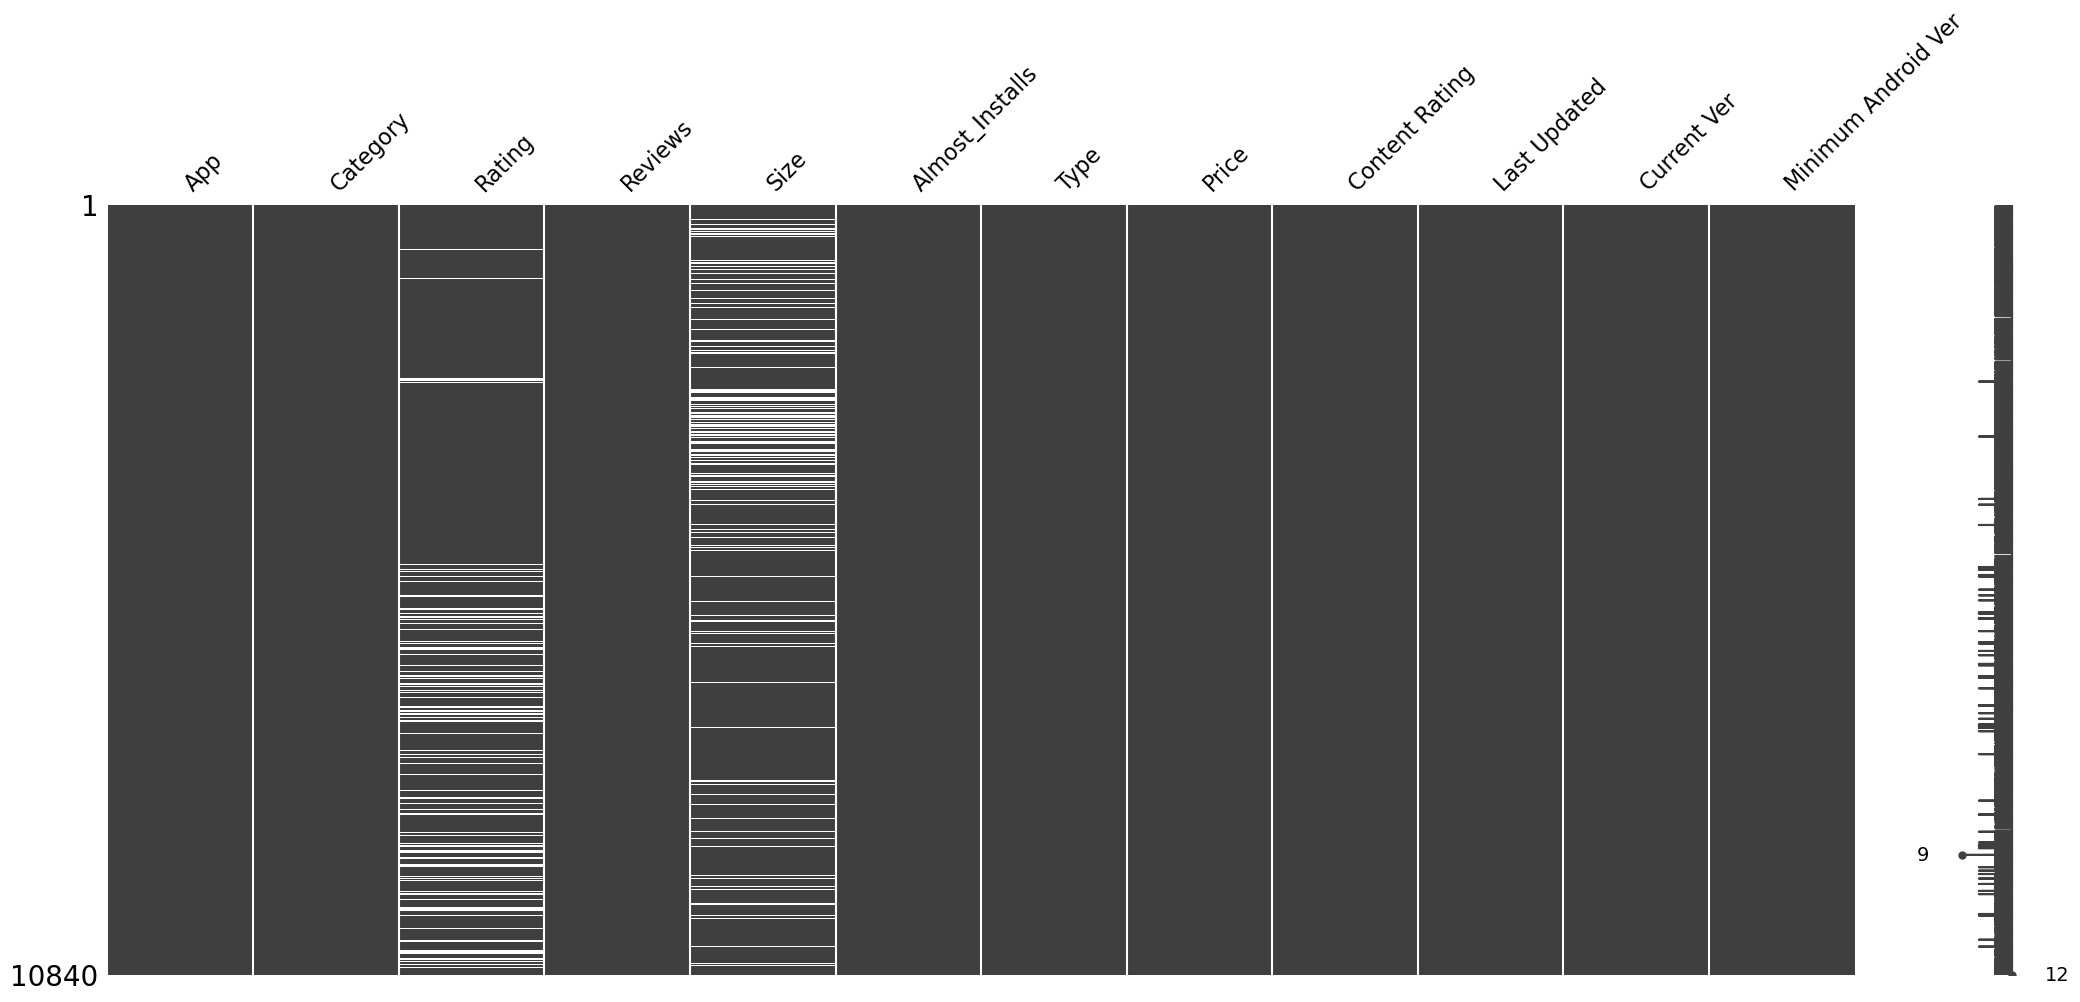

In [43]:
msno.matrix(playstore)
plt.show()

In [44]:
#dropping rating missing data is better than replacing them with median or mean as it will be fake data and can affect statistics 
playstore.dropna(subset=['Rating'], inplace=True)

In [45]:
playstore.isna().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                   1637
Almost_Installs           0
Type                      0
Price                     0
Content Rating            0
Last Updated              0
Current Ver               4
Minimum Android Ver       2
dtype: int64

In [54]:
#replacing missing data in size column with median
playstore['Size'] = playstore['Size'].fillna(playstore['Size'].median())

In [49]:
playstore.groupby('Type')['Size'].mean()

Type
Free    32.395688
Paid    49.313756
Name: Size, dtype: float64

In [52]:
#removing missing data in other columns as there is only small NO. of rows
playstore.dropna(inplace=True)

In [53]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App                  9360 non-null   object        
 1   Category             9360 non-null   object        
 2   Rating               9360 non-null   float64       
 3   Reviews              9360 non-null   int64         
 4   Size                 9360 non-null   float64       
 5   Almost_Installs      9360 non-null   int64         
 6   Type                 9360 non-null   object        
 7   Price                9360 non-null   float64       
 8   Content Rating       9360 non-null   object        
 9   Last Updated         9360 non-null   datetime64[ns]
 10  Current Ver          9360 non-null   object        
 11  Minimum Android Ver  9360 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 950.6+ KB


**Check for duplicates and removing them** 

In [57]:
playstore.duplicated().sum()

np.int64(474)

In [58]:
playstore.drop_duplicates(inplace=True)

In [59]:
playstore.duplicated().sum()

np.int64(0)

In [60]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App                  8886 non-null   object        
 1   Category             8886 non-null   object        
 2   Rating               8886 non-null   float64       
 3   Reviews              8886 non-null   int64         
 4   Size                 8886 non-null   float64       
 5   Almost_Installs      8886 non-null   int64         
 6   Type                 8886 non-null   object        
 7   Price                8886 non-null   float64       
 8   Content Rating       8886 non-null   object        
 9   Last Updated         8886 non-null   datetime64[ns]
 10  Current Ver          8886 non-null   object        
 11  Minimum Android Ver  8886 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 902.5+ KB


In [65]:
playstore['Content Rating'].value_counts()

Content Rating
Everyone           7089
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Name: count, dtype: int64

**Detecting Outliers and deal with them**

In [71]:
playstore.describe()

,Rating,Reviews,Size,Almost_Installs,Price,Last Updated
count,8885.000000,8.885000e+03,8885.000000,8.885000e+03,8885.000000,8885
mean,4.187968,4.731459e+05,34.028115,1.650246e+07,0.963634,2017-11-22 06:08:32.954417408
min,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,1.640000e+02,7.300000,1.000000e+04,0.000000,2017-09-21 00:00:00
50%,4.300000,4.724000e+03,16.000000,5.000000e+05,0.000000,2018-05-28 00:00:00
75%,4.500000,7.132800e+04,31.000000,5.000000e+06,0.000000,2018-07-23 00:00:00
max,5.000000,7.815831e+07,994.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.522457,2.906166e+06,87.170213,8.640882e+07,16.195701,NaN


<Axes: xlabel='Rating'>

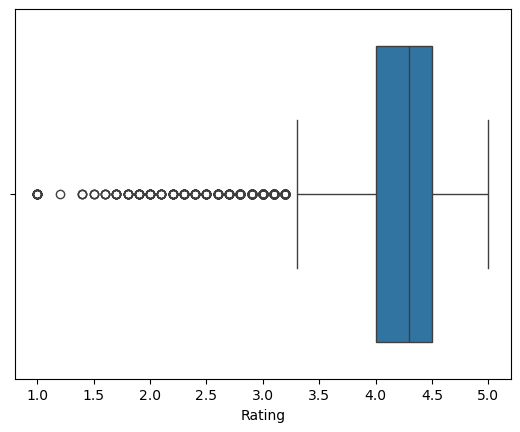

In [69]:
sns.boxplot(x = 'Rating' , data = playstore)

In [88]:
Q1_Rating = playstore['Rating'].quantile(0.25)
Q3_Rating = playstore['Rating'].quantile(0.75)
IQR_Rating = Q3_Rating - Q1_Rating
lower_bound_Rating = Q1_Rating - 1.5 * IQR_Rating
upper_bound_Rating = Q3_Rating + 1.5 * IQR_Rating

In [89]:
outliers_Rating = playstore[(playstore['Rating'] < lower_bound_Rating) | (playstore['Rating'] > upper_bound_Rating)]

In [90]:
num_outliers_Rating = outliers_Rating.shape[0]
num_outliers_Rating

494

In [99]:
playstore['Rating'].describe()

count    8885.000000
mean        4.187968
std         0.522457
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

There is no invalid data all data between 1 and 5, outliers not be dropped or replaced as the data is true and logic

<Axes: xlabel='Reviews'>

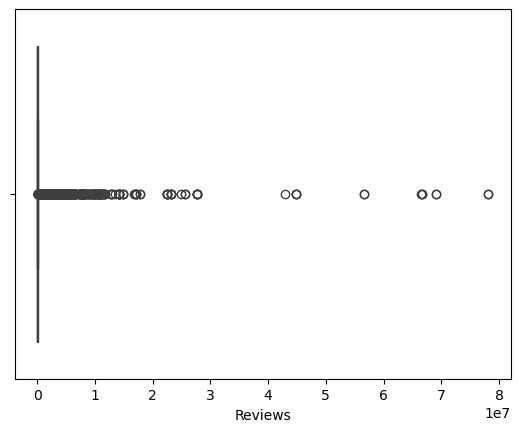

In [70]:
sns.boxplot(x = 'Reviews' , data = playstore)

In [85]:
Q1_Reviews = playstore['Reviews'].quantile(0.25)
Q3_Reviews = playstore['Reviews'].quantile(0.75)
IQR_Reviews = Q3_Reviews - Q1_Reviews
lower_bound_Reviews = Q1_Reviews - 1.5 * IQR_Reviews
upper_bound_Reviews = Q3_Reviews + 1.5 * IQR_Reviews

In [86]:
outliers_Reviews = playstore[(playstore['Reviews'] < lower_bound_Reviews) | (playstore['Reviews'] > upper_bound_Reviews)]

In [87]:
num_outliers_Reviews = outliers_Reviews.shape[0]
num_outliers_Reviews

1555

In [97]:
playstore['Reviews'].describe()

count    8.885000e+03
mean     4.731459e+05
std      2.906166e+06
min      1.000000e+00
25%      1.640000e+02
50%      4.724000e+03
75%      7.132800e+04
max      7.815831e+07
Name: Reviews, dtype: float64

Leaving outliers in reviews column as it is meaningful and logic

<Axes: xlabel='Size'>

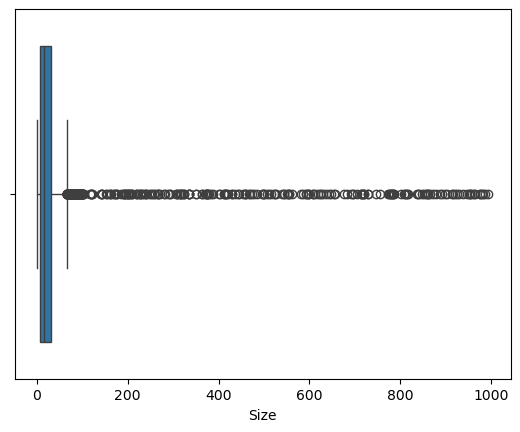

In [72]:
sns.boxplot(x = 'Size' , data = playstore)

In [91]:
Q1_Size = playstore['Size'].quantile(0.25)
Q3_Size = playstore['Size'].quantile(0.75)
IQR_Size = Q3_Size - Q1_Size
lower_bound_Size = Q1_Size - 1.5 * IQR_Size
upper_bound_Size = Q3_Size + 1.5 * IQR_Size

In [92]:
outliers_Size = playstore[(playstore['Size'] < lower_bound_Size) | (playstore['Size'] > upper_bound_Size)]

In [93]:
num_outliers_Size = outliers_Size.shape[0]
num_outliers_Size

771

In [100]:
playstore['Size'].describe()

count    8885.000000
mean       34.028115
std        87.170213
min         1.000000
25%         7.300000
50%        16.000000
75%        31.000000
max       994.000000
Name: Size, dtype: float64

Leaving outliers in size column as it is meaningful and logic

<Axes: xlabel='Almost_Installs'>

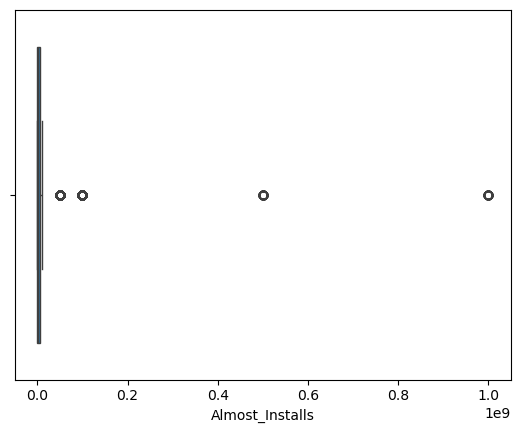

In [73]:
sns.boxplot(x = 'Almost_Installs' , data = playstore)

In [94]:
Q1_Installs = playstore['Almost_Installs'].quantile(0.25)
Q3_Installs = playstore['Almost_Installs'].quantile(0.75)
IQR_Installs = Q3_Installs - Q1_Installs
lower_bound_Installs = Q1_Installs - 1.5 * IQR_Installs
upper_bound_Installs = Q3_Installs + 1.5 * IQR_Installs

In [95]:
outliers_Installs = playstore[(playstore['Almost_Installs'] < lower_bound_Installs) | (playstore['Almost_Installs'] > upper_bound_Installs)]

In [96]:
num_outliers_Installs = outliers_Installs.shape[0]
num_outliers_Installs

751

In [102]:
playstore['Almost_Installs'].describe()

count    8.885000e+03
mean     1.650246e+07
std      8.640882e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Almost_Installs, dtype: float64

Leaving outliers in size column as it is meaningful and logic and there is no invalid values in them

<Axes: xlabel='Price'>

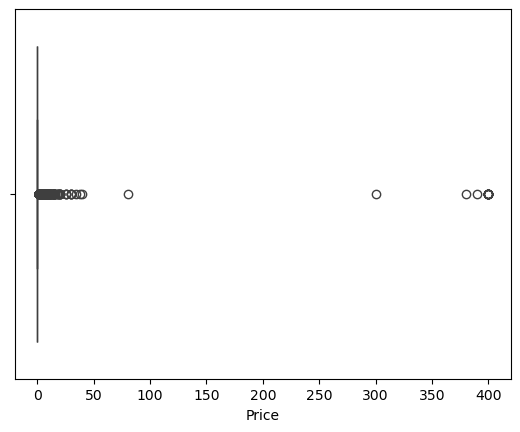

In [74]:
sns.boxplot(x = 'Price' , data = playstore)

In [109]:
Q1_Price = playstore['Price'].quantile(0.25)
Q3_Price = playstore['Price'].quantile(0.75)
IQR_Price = Q3_Price - Q1_Price
lower_bound_Price = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [110]:
outliers = playstore[(playstore['Price'] < lower_bound) | (playstore['Price'] > upper_bound)]

In [111]:
num_outliers = outliers.shape[0]
num_outliers

611

In [104]:
playstore['Price'].describe()

count    8885.000000
mean        0.963634
std        16.195701
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [108]:
#Check for expensive apps or they are invalid values
playstore[playstore['Price'] > 100].head(40)

,App,Category,Rating,Reviews,Size,Almost_Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,399.99,Everyone,2018-07-16,1.0,7.0
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,Everyone,2018-03-11,1.0.0,4.4
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,2018-05-03,1.0.1,4.1
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,2018-01-12,2.0,4.0.3
5354,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,399.99,Everyone,2018-05-19,3.0,4.4
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6,10000,Paid,299.99,Everyone,2018-07-21,1.1.1,4.3
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,2017-11-12,1.6,4.0
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9,1000,Paid,379.99,Everyone,2018-07-01,1.0,4.0
5358,I am Rich!,FINANCE,3.8,93,22.0,1000,Paid,399.99,Everyone,2017-12-11,1.0,4.1
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,2017-05-01,3.4,4.4


it seems that expensive apps is for premium apps and not invalid data, so leaving outliers as it is meaningful and true data

**Analytical Answers**

**1. Most Expensive app in playstore**

In [117]:
most_expensive = playstore.sort_values(by='Price', ascending=False)
most_expensive[['App','Price']].head(1)

,App,Price
4367,I'm Rich - Trump Edition,400.0


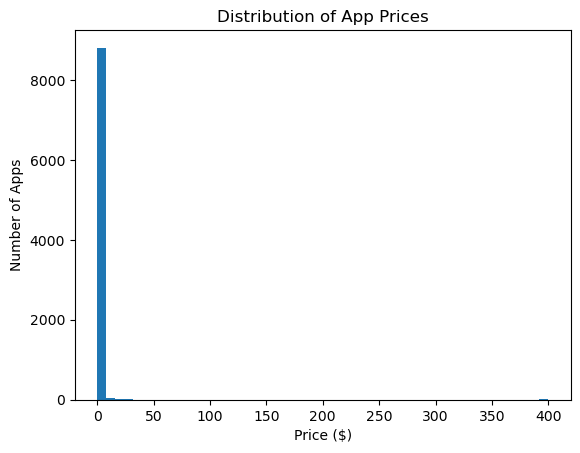

In [118]:
plt.hist(playstore['Price'], bins=50)
plt.title('Distribution of App Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Apps')
plt.show()

**2. The genre has the highest number of apps**

In [127]:
#there is about 95% of detailed genres is missing data, and main genere are the same as in category
genre_counts = playstore['Category'].value_counts()
genre_counts

Category
FAMILY                 1717
GAME                   1074
TOOLS                   732
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22716\1269372735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')


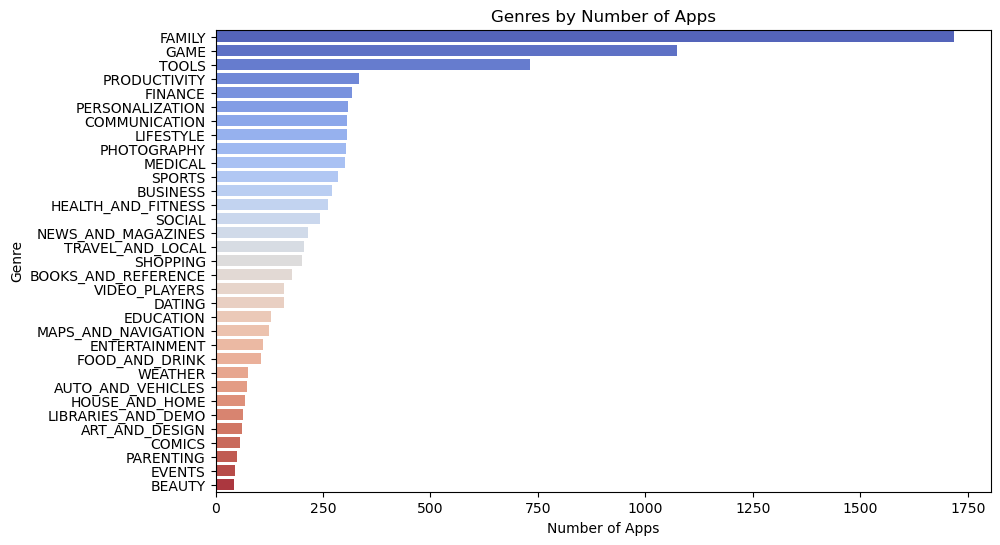

In [129]:
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
plt.title('Genres by Number of Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Genre')
plt.show()

**3. The average size of free vs. paid apps**

In [131]:
avg_size_by_type = playstore.groupby('Type')['Size'].mean()
print(avg_size_by_type)

Type
Free    32.861445
Paid    49.826841
Name: Size, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22716\4198929629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Type', y='Size', data=playstore, palette='coolwarm')


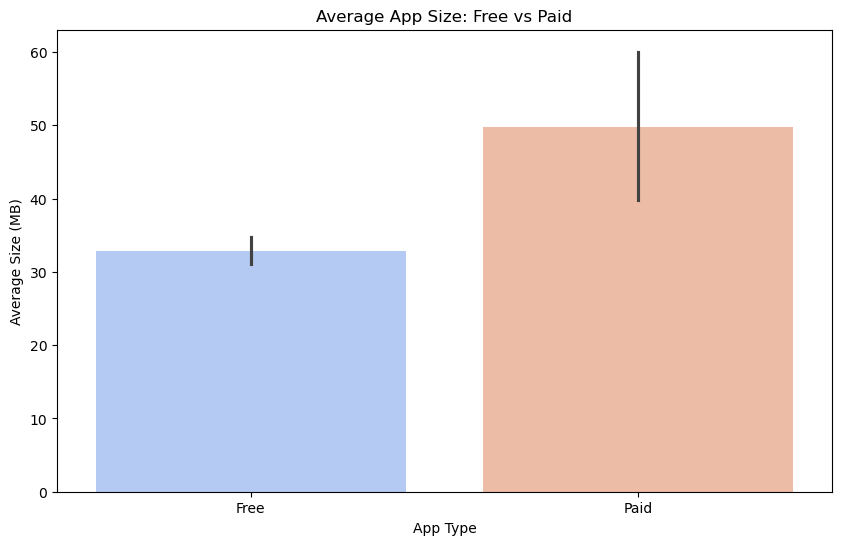

In [137]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Type', y='Size', data=playstore, palette='coolwarm')
plt.title('Average App Size: Free vs Paid')
plt.xlabel('App Type')
plt.ylabel('Average Size (MB)')
plt.show()

**4. The top 5 most expensive apps with a perfect rating (5)**

In [138]:
most_rated = playstore[playstore['Rating'] == 5.0]
top_expensive_most_rated = most_rated.sort_values(by='Price', ascending=False).head(5)
top_expensive_most_rated[['App', 'Price', 'Rating']]

,App,Price,Rating
5489,AP Art History Flashcards,29.99,5.0
7477,USMLE Step 2 CK Flashcards,19.99,5.0
5482,meStudying: AP English Lit,4.99,5.0
7204,TI-84 CE Graphing Calculator Manual TI 84,4.99,5.0
5246,Hey AJ! It's Bedtime!,4.99,5.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22716\794715685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='App', data=top_expensive_most_rated, palette='viridis')


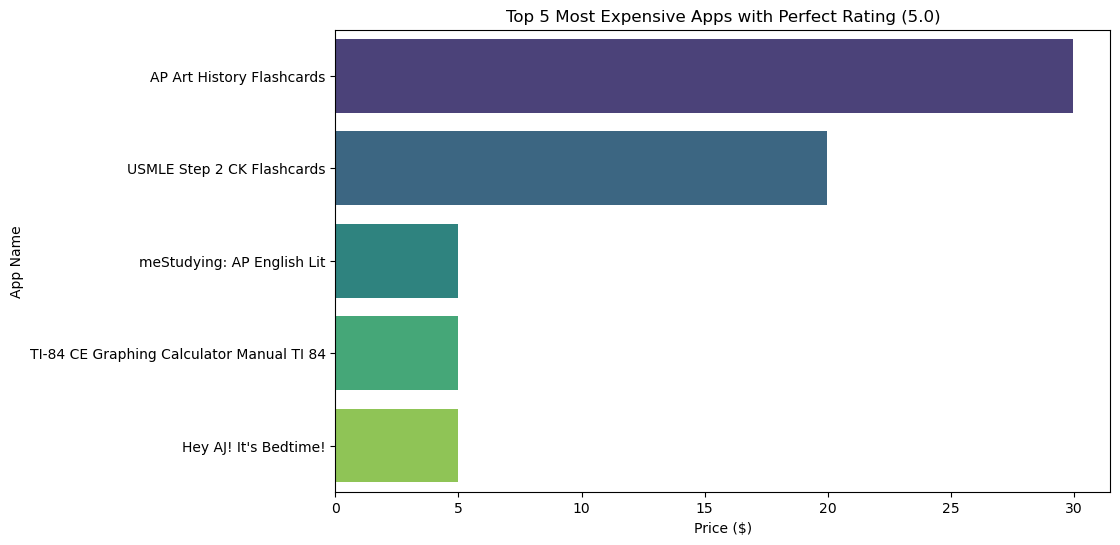

In [140]:
plt.figure(figsize=(10,6))
sns.barplot(x='Price', y='App', data=top_expensive_most_rated, palette='viridis')
plt.title('Top 5 Most Expensive Apps with Perfect Rating (5.0)')
plt.xlabel('Price ($)')
plt.ylabel('App Name')
plt.show()

**5. No. of apps have received more than 50K reviews**

In [149]:
most_reviewed = playstore.sort_values(by='Reviews', ascending=False)
most_reviewed

,App,Category,Rating,Reviews,Size,Almost_Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver
2544,Facebook,SOCIAL,4.1,78158306,16.0,1000000000,Free,0.00,Teen,2018-08-03,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,16.0,1000000000,Free,0.00,Everyone,2018-08-03,Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,16.0,1000000000,Free,0.00,Teen,2018-07-31,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,16.0,1000000000,Free,0.00,Everyone,2018-08-01,Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888,98.0,100000000,Free,0.00,Everyone 10+,2018-07-15,10.322.16,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...
7377,CI 174 Gray Icon Pack,PERSONALIZATION,5.0,1,46.0,10,Paid,0.99,Everyone,2018-05-21,1.1,4.1
625,House party - live chat,DATING,1.0,1,9.2,10,Free,0.00,Mature 17+,2018-07-31,3.52,4.0.3
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9,1000,Free,0.00,Everyone,2018-05-21,6.2-sayc,4.0
8379,DG-App,TOOLS,5.0,1,4.5,500,Free,0.00,Everyone,2017-11-29,1.0.16,4.1


In [150]:
#There is a problem in removing duplicates as the records identical in all columns except Review column
playstore = playstore.sort_values(by='Reviews', ascending=False)
playstore = playstore.drop_duplicates(subset='App', keep='first')

In [155]:
apps_over_50k = playstore[playstore['Reviews'] > 50000]
print("Number of apps with more than 50K reviews:", apps_over_50k.shape[0])

Number of apps with more than 50K reviews: 1948


In [156]:
playstore['High_Reviews'] = playstore['Reviews'].apply(lambda x: 'More than 50K' if x > 50000 else '50K or Less')

In [159]:
review_counts = playstore['High_Reviews'].value_counts()
review_counts

High_Reviews
50K or Less      6241
More than 50K    1948
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22716\2792734430.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_counts.index, y=review_counts.values, palette='viridis')


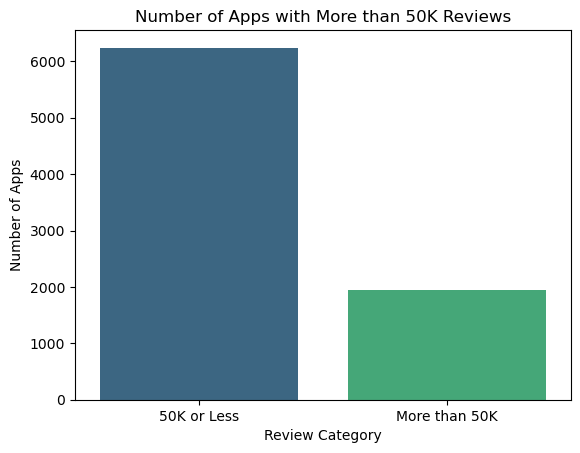

In [160]:
sns.barplot(x=review_counts.index, y=review_counts.values, palette='viridis')
plt.title('Number of Apps with More than 50K Reviews')
plt.xlabel('Review Category')
plt.ylabel('Number of Apps')
plt.show()

**6. The average price of apps, grouped by genre and number of installs**

In [169]:
avg_price_installs_by_category = playstore.groupby('Category', as_index=False).agg({ 'Price': 'mean','Almost_Installs': 'mean'})
avg_price_installs_by_category 

,Category,Price,Almost_Installs
0,ART_AND_DESIGN,0.102931,1.952209e+06
1,AUTO_AND_VEHICLES,0.027260,7.278055e+05
2,BEAUTY,0.000000,6.408619e+05
3,BOOKS_AND_REFERENCE,0.141302,9.856755e+06
4,BUSINESS,0.244905,2.650259e+06
5,COMICS,0.000000,8.320574e+05
6,COMMUNICATION,0.221445,4.311813e+07
7,DATING,0.090075,1.059484e+06
8,EDUCATION,0.076000,1.808105e+06
9,ENTERTAINMENT,0.092791,1.144953e+07


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22716\548534983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_installs_by_category.sort_values('Price', ascending=False),


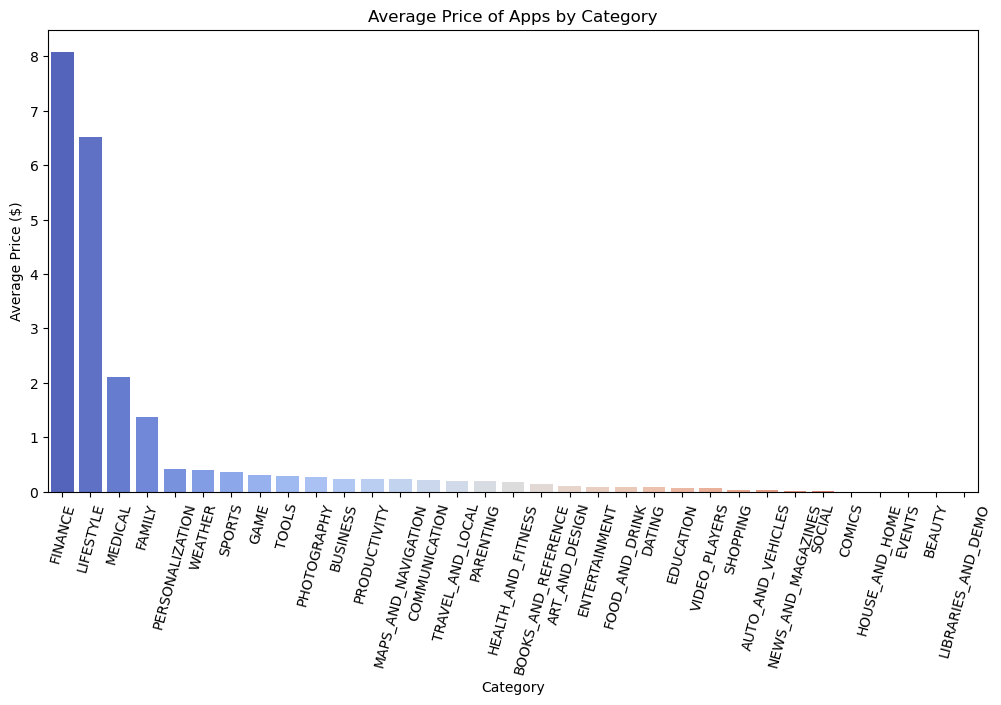

In [176]:
plt.figure(figsize=(12,6))
sns.barplot(data=avg_price_installs_by_category.sort_values('Price', ascending=False),
            x='Category', y='Price', palette='coolwarm')
plt.title('Average Price of Apps by Category')
plt.xticks(rotation=75)
plt.ylabel('Average Price ($)')
plt.xlabel('Category')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22716\3868505904.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_installs_by_category.sort_values('Almost_Installs', ascending=False), x='Category', y='Almost_Installs', palette='coolwarm')


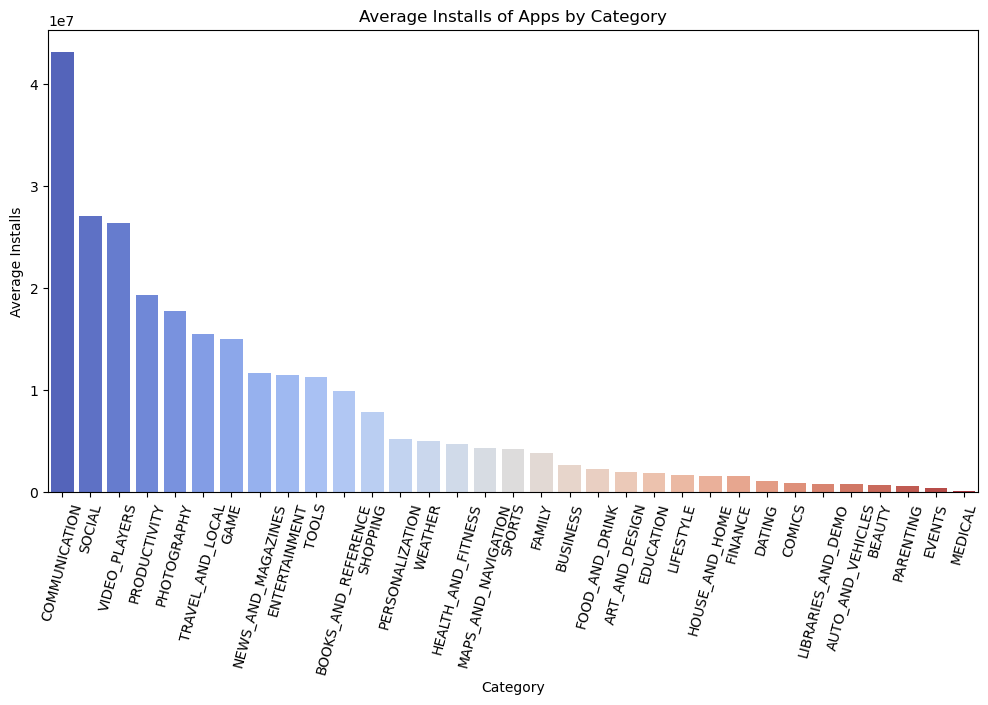

In [178]:
plt.figure(figsize=(12,6))
sns.barplot(data=avg_price_installs_by_category.sort_values('Almost_Installs', ascending=False), x='Category', y='Almost_Installs', palette='coolwarm')
plt.title('Average Installs of Apps by Category')
plt.xticks(rotation=75)
plt.ylabel('Average Installs')
plt.xlabel('Category')
plt.show()

**7. No. of apps have a rating higher than 4.7, and what is their average price**

In [180]:
high_rate_apps= playstore[playstore['Rating'] > 4.7]
print("Number of apps with reviews > 4.7:", high_rate_apps.shape[0])

Number of apps with reviews > 4.7: 576


In [186]:
avg_price_high_rate = high_rate_apps['Price'].mean()
print("Average price of apps with rating > 4.7:",'$', avg_price_high_rate)

Average price of apps with rating > 4.7: $ 0.46289930555555553


**9. the maximum and minimum sizes of free vs. paid apps**

In [192]:
size_stats = playstore.groupby('Type', as_index=False).agg({'Size': ['min', 'max']})
size_stats

Type Size       
         min    max
0  Free  1.0  994.0
1  Paid  1.0  965.0

In [195]:
size_stats.columns = ['Type', 'Min_Size_MB', 'Max_Size_MB']
print(size_stats.head())

   Type  Min_Size_MB  Max_Size_MB
0  Free          1.0        994.0
1  Paid          1.0        965.0


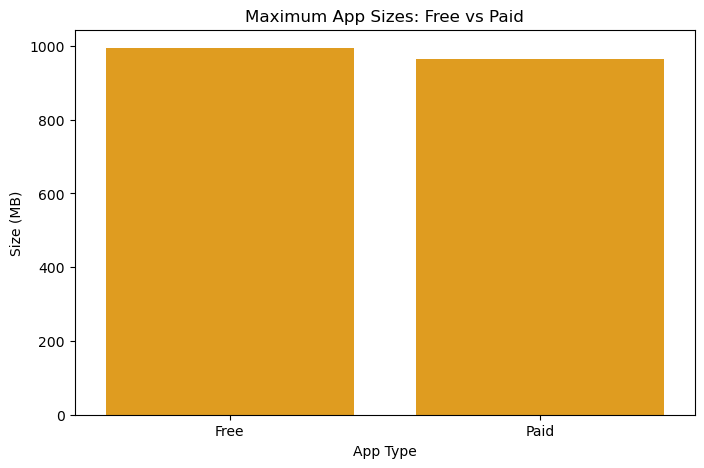

In [203]:
plt.figure(figsize=(8,5))
sns.barplot(data=size_stats, x='Type', y='Max_Size_MB', color='orange')
plt.title('Maximum App Sizes: Free vs Paid')
plt.xlabel('App Type')
plt.ylabel('Size (MB)')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22716\766888834.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


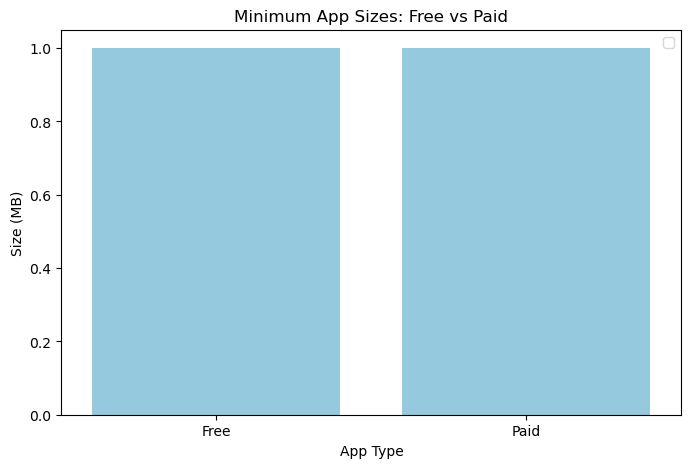

In [202]:
plt.figure(figsize=(8,5))
sns.barplot(data=size_stats, x='Type', y='Min_Size_MB', color='skyblue')
plt.title('Minimum App Sizes: Free vs Paid')
plt.xlabel('App Type')
plt.ylabel('Size (MB)')
plt.legend()
plt.show()

**10. Correlation Between Rating, Reviews, Size, and Price**

In [205]:
corr_data = playstore[['Rating', 'Reviews', 'Size', 'Price']]

In [206]:
corr_matrix = corr_data.corr()
print(corr_matrix)

           Rating   Reviews      Size     Price
Rating   1.000000  0.055146 -0.026847 -0.021126
Reviews  0.055146  1.000000 -0.001620 -0.007781
Size    -0.026847 -0.001620  1.000000  0.020522
Price   -0.021126 -0.007781  0.020522  1.000000


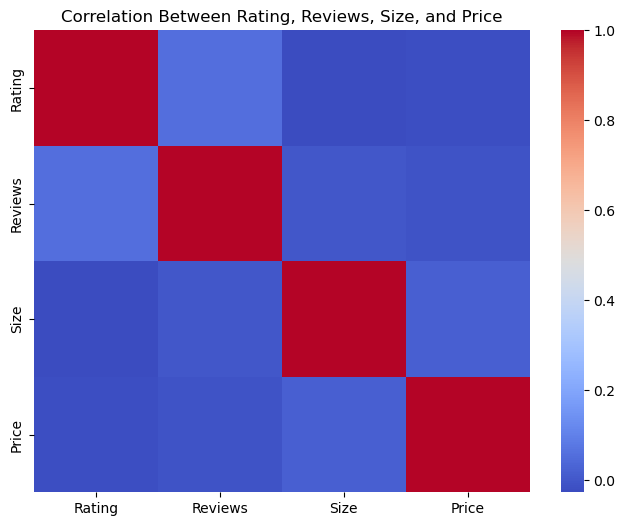

In [209]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,cmap='coolwarm')
plt.title("Correlation Between Rating, Reviews, Size, and Price")
plt.show()

There is almost no correlation between them, but there is a small correlation between reviews and rating, and size and price

**11. No. of apps exist for each type (free/paid) across different content ratings**

In [211]:
pivot_table = playstore.pivot_table(index='Content Rating', 
                                    columns='Type', 
                                    values='App', 
                                    aggfunc='count', 
                                    fill_value=0)
pivot_table

Type,Free,Paid
Content Rating,,
Adults only 18+,3,0
Everyone,6103,509
Everyone 10+,274,31
Mature 17+,342,15
Teen,867,45


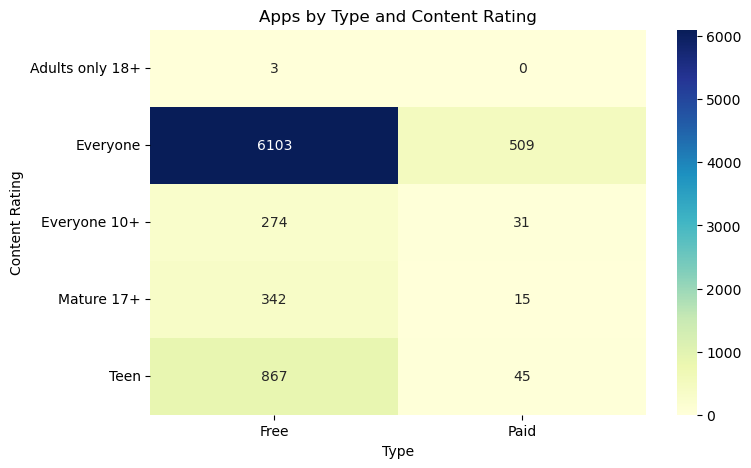

In [217]:
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Apps by Type and Content Rating')
plt.xlabel('Type')
plt.ylabel('Content Rating')
plt.show()

**12. No. of apps are compatible with Android version 4.x**

In [219]:
android_4x_apps = playstore[playstore['Minimum Android Ver'].str.startswith('4.', na=False)]
num_android_4x = android_4x_apps.shape[0]
print("Number of apps compatible with Android 4.x: ",num_android_4x)

Number of apps compatible with Android 4.x:  5215


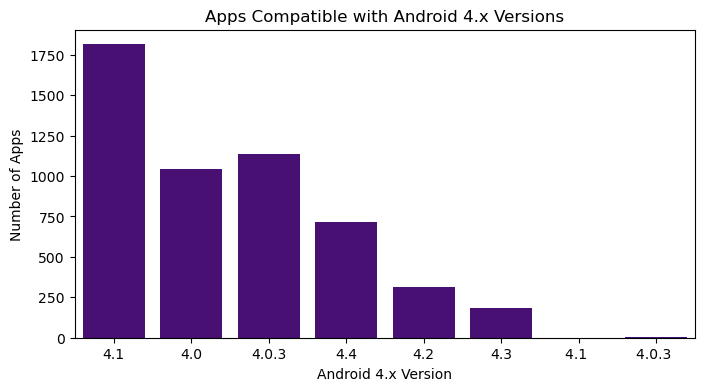

In [222]:
plt.figure(figsize=(8,4))
sns.countplot(data=android_4x_apps, x='Minimum Android Ver', color='indigo')
plt.title('Apps Compatible with Android 4.x Versions')
plt.xlabel('Android 4.x Version')
plt.ylabel('Number of Apps')
plt.show()

